In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

In [3]:
dataframes = []

files = [f for f in os.listdir() if f.endswith('.csv')]

for fichier in files:
    chemin_fichier = os.path.join(os.getcwd(), fichier)
    rows = []
    
    try:
        with open(chemin_fichier, mode="r", encoding="ISO-8859-1") as file:
            reader = csv.DictReader(file, delimiter=";")
            
            for row in reader:
                level = row.get("level", "unknown") 
                try:
                    score = int(row.get("score", 0))
                except ValueError:
                    score = 0
                mode = row.get("mode", "unknown")
                cleared = row.get("cleared", "unknown")
                player_name = os.path.splitext(fichier)[0]
                
                rows.append({
                    "player_name": player_name,
                    "level": level,
                    "score": score,
                    "mode": mode,
                    "cleared": cleared,
                })
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {fichier} : {e}")
        continue

    if rows:
        df = pd.DataFrame(rows)
        dataframes.append(df)

for i, df in enumerate(dataframes):
    print(f"DataFrame {i + 1} :")
    print(df)
    print("\n" + "=" * 50 + "\n")

DataFrame 1 :
   player_name                           level  score    mode cleared
0         Aure              Easy - Next To You    214  Normal     Yes
1         Aure              Easy - Next To You      0  Normal      No
2         Aure               Hard - Beat Saber      3   Rythm      No
3         Aure               Hard - Beat Saber      5  Normal      No
4         Aure               Hard - Beat Saber      3  Normal      No
5         Aure               Hard - Beat Saber      1  Normal      No
6         Aure               Hard - Beat Saber      1   Rythm      No
7         Aure  Ultra Hardcore - Hardstyle LFN      1   Rythm      No
8         Aure  Ultra Hardcore - Hardstyle LFN      1   Rythm      No
9         Aure  Ultra Hardcore - Hardstyle LFN      3   Rythm      No
10        Aure               Hard - Beat Saber      1   Rythm      No
11        Aure               Hard - Beat Saber      6   Rythm      No
12        Aure         Intermediate - Warriors      2   Rythm      No
13    

In [4]:
print(df)

   player_name                           level  score    mode cleared
0          vic         Intermediate - Warriors      5  Normal      No
1          vic         Intermediate - Warriors      3   Rythm      No
2          vic         Intermediate - Warriors      2  Normal      No
3          vic         Intermediate - Warriors      0  Normal      No
4          vic         Intermediate - Warriors      0  Normal      No
5          vic                   GOD - Camelia      0   Rythm      No
6          vic                   GOD - Camelia      0  Normal      No
7          vic                   GOD - Camelia      0  Normal      No
8          vic                   GOD - Camelia      1   Rythm      No
9          vic                   GOD - Camelia      0   Rythm      No
10         vic                   GOD - Camelia      0   Rythm      No
11         vic                   GOD - Camelia      0   Rythm      No
12         vic                   GOD - Camelia      0   Rythm      No
13         vic      

In [5]:
df1 = pd.read_csv('lelian.csv', delimiter=";")
print(df1)

                      level              date  score    mode cleared
0        Easy - Next To You  15/11/2024 15:19     21  Normal      No
1   Intermediate - Warriors  15/11/2024 15:19      1  Normal      No
2   Intermediate - Warriors  15/11/2024 15:19      1  Normal      No
3   Intermediate - Warriors  15/11/2024 15:19      1  Normal      No
4   Intermediate - Warriors  15/11/2024 15:20      0  Normal      No
5   Intermediate - Warriors  15/11/2024 15:20     18   Rythm      No
6             GOD - Camelia  15/11/2024 15:21      9  Normal      No
7             GOD - Camelia  15/11/2024 15:21      0   Rythm      No
8             GOD - Camelia  15/11/2024 15:21      0   Rythm      No
9             GOD - Camelia  15/11/2024 15:22      1  Normal      No
10            GOD - Camelia  15/11/2024 15:22      0  Normal      No
11            GOD - Camelia  15/11/2024 15:22      1  Normal      No
12            GOD - Camelia  15/11/2024 15:22      2  Normal      No
13        Hard - Beat Saber  15/11

In [6]:

combined_df = pd.concat(dataframes, ignore_index=True)
print(combined_df.head())

output_file = "fichiers_combines.csv"
combined_df.to_csv(output_file, index=False, encoding="utf-8-sig", sep=";")


  player_name               level  score    mode cleared
0        Aure  Easy - Next To You    214  Normal     Yes
1        Aure  Easy - Next To You      0  Normal      No
2        Aure   Hard - Beat Saber      3   Rythm      No
3        Aure   Hard - Beat Saber      5  Normal      No
4        Aure   Hard - Beat Saber      3  Normal      No


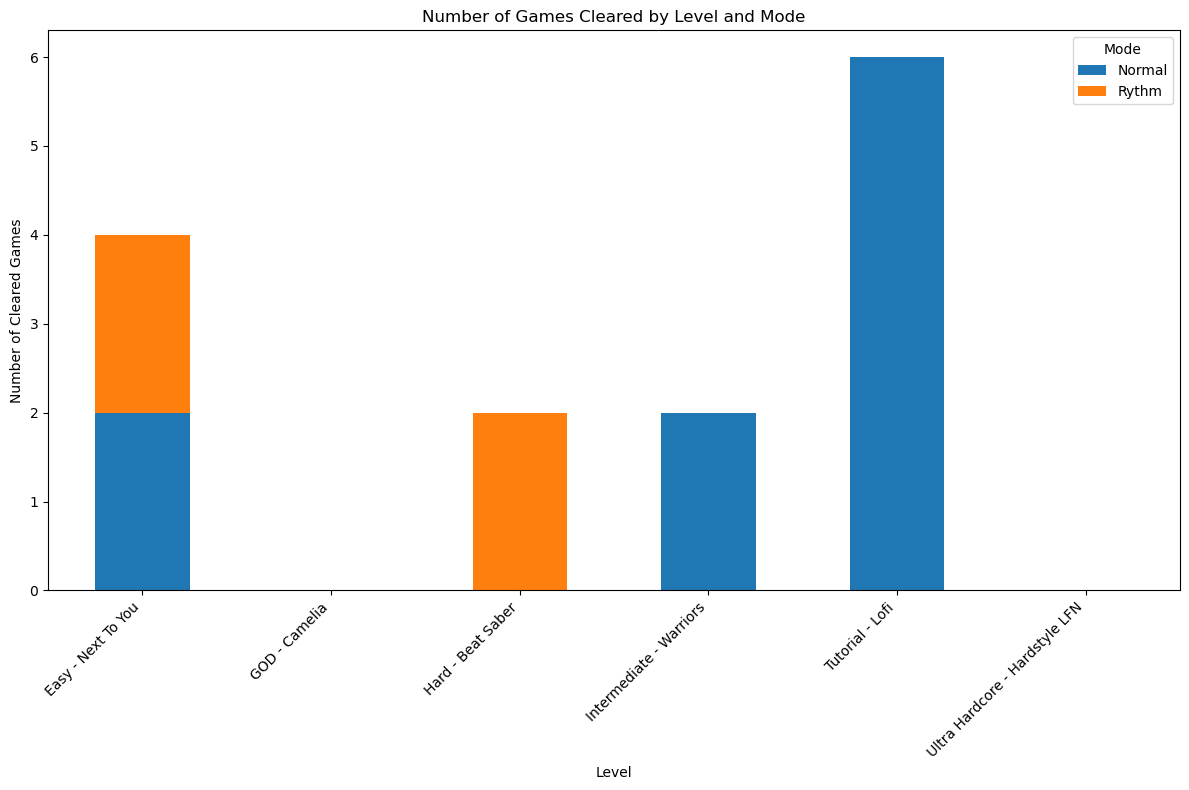

In [7]:
#Cleared level
all_levels = combined_df['level'].unique()
all_modes = combined_df['mode'].unique()
cleared_data = combined_df[combined_df['cleared'] == 'Yes']
all_combinations = pd.MultiIndex.from_product([all_levels, all_modes], names=['level', 'mode'])
cleared_counts = cleared_data.groupby(['level', 'mode']).size().reindex(all_combinations, fill_value=0).unstack()

cleared_counts.plot(kind='bar', figsize=(12, 8), stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title("Number of Games Cleared by Level and Mode")
plt.xlabel("Level")
plt.ylabel("Number of Cleared Games")
plt.legend(title="Mode")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

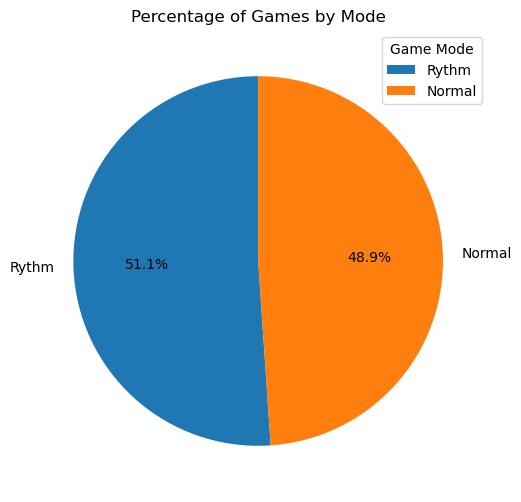

In [8]:
#Most played mode
mode_counts = combined_df['mode'].value_counts()

plt.figure(figsize=(8, 6))
mode_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title("Percentage of Games by Mode")
plt.ylabel("")
plt.legend(title="Game Mode")
plt.show()


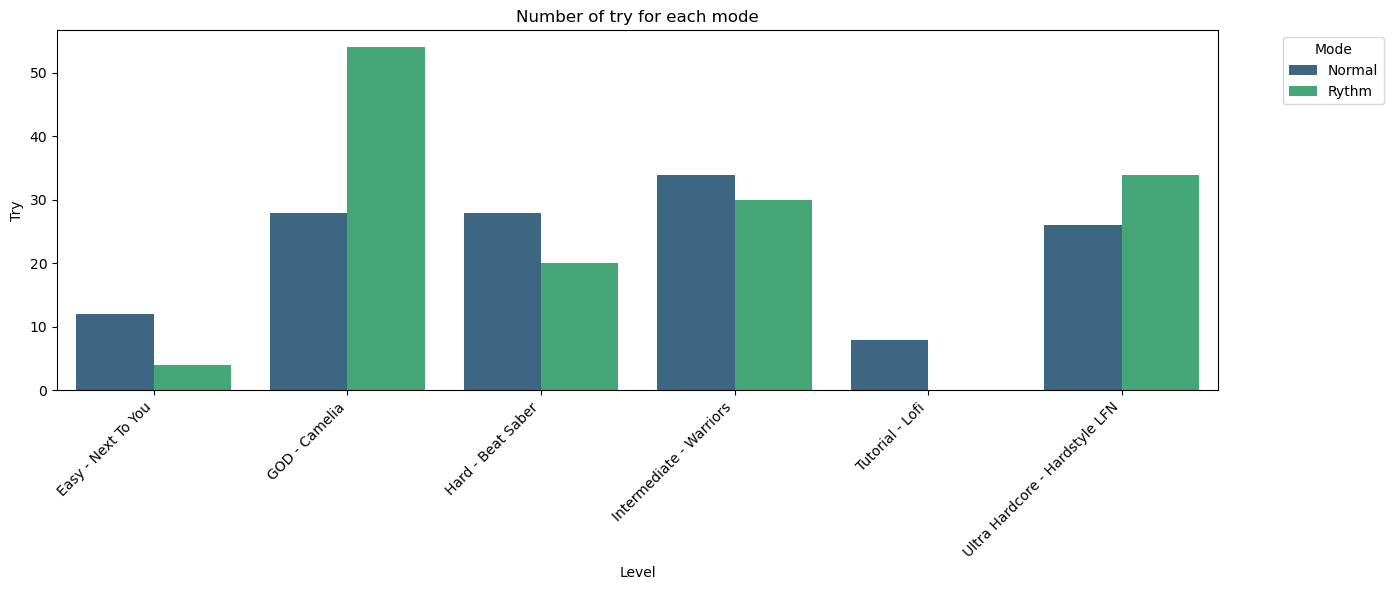

In [9]:
#Show each different level played
data = pd.read_csv('fichiers_combines.csv', delimiter=";")
play_stats = data.groupby(['level', 'mode']).size().reset_index(name='play_count')
success_stats = data[data['cleared'] == 1].groupby(['level', 'mode']).size().reset_index(name='success_count')
stats = pd.merge(play_stats, success_stats, on=['level', 'mode'], how='left')
stats['success_count'] = stats['success_count'].fillna(0)

plt.figure(figsize=(14, 6))
sns.barplot(data=stats, x='level', y='play_count', hue='mode', palette='viridis', errorbar=None)
plt.title("Number of try for each mode")
plt.xlabel("Level")
plt.ylabel("Try")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Mode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\fabie\AppData\Local\Temp\ipykernel_10984\4289706780.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=game_stats, x='level', y='game_count', hue='mode', ci=None, palette='viridis')


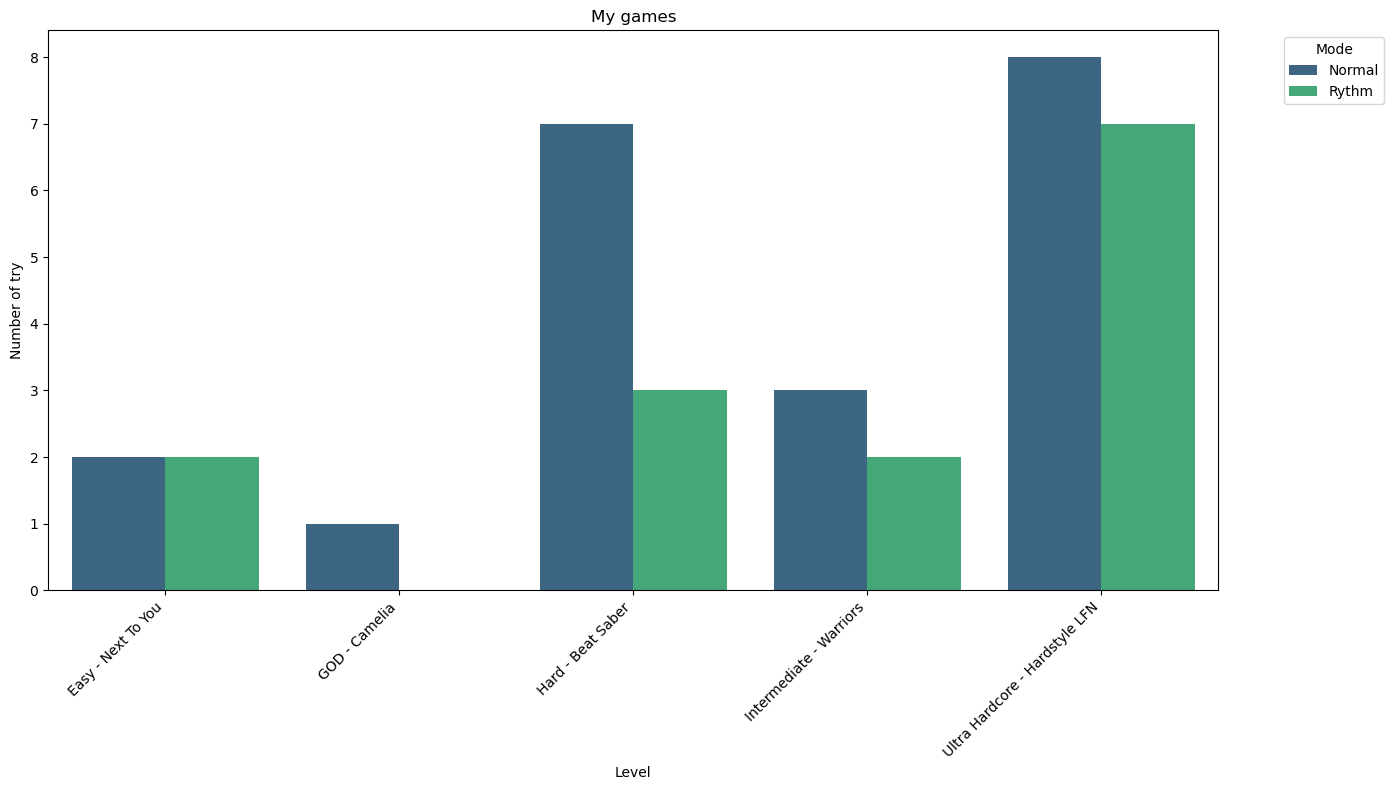

In [10]:
#My games
data = pd.read_csv('moi.csv', delimiter=';')
game_stats = data.groupby(['level', 'mode']).size().reset_index(name='game_count')

plt.figure(figsize=(14, 8))
sns.barplot(data=game_stats, x='level', y='game_count', hue='mode', ci=None, palette='viridis')
plt.title("My games")
plt.xlabel("Level")
plt.ylabel("Number of try")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Mode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

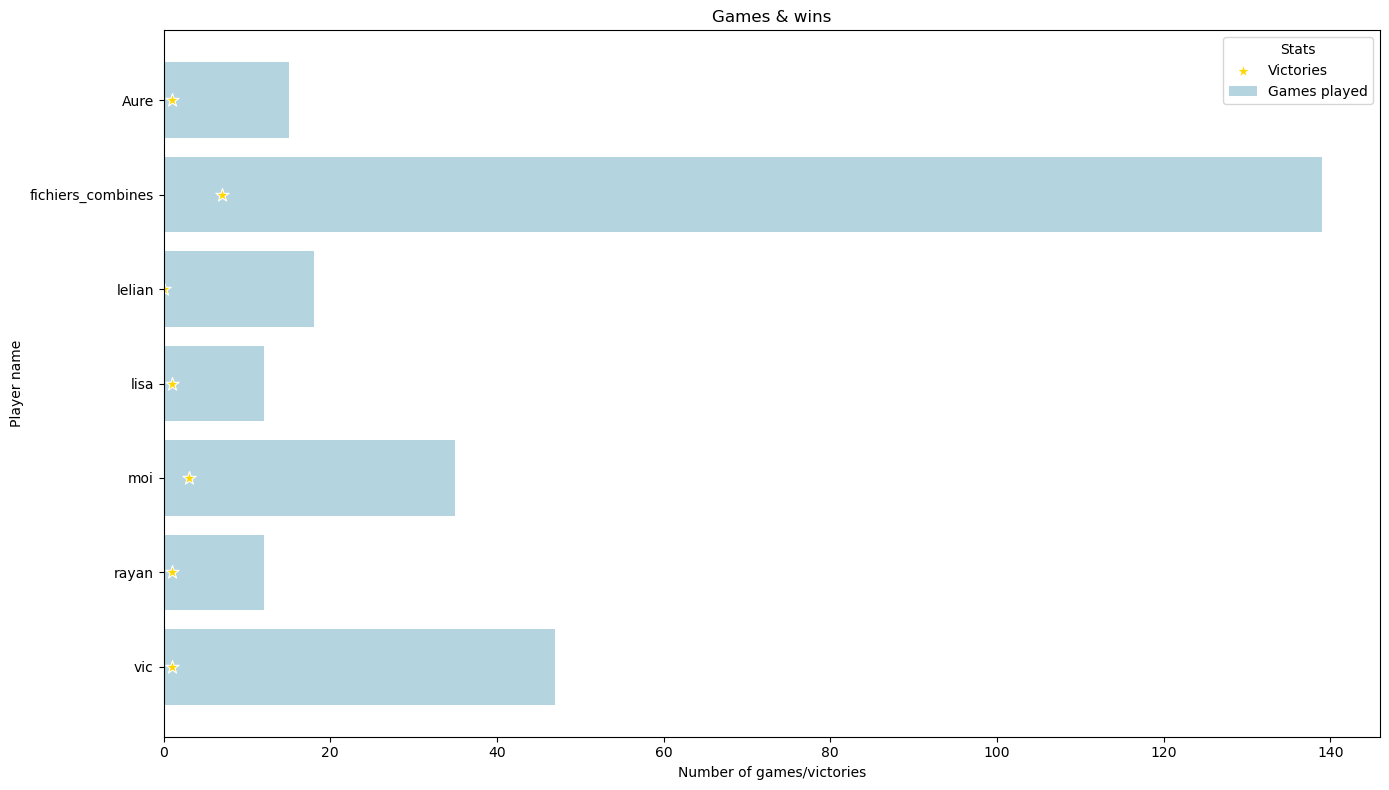

In [11]:
#Player stats
data = pd.read_csv('fichiers_combines.csv', delimiter=';')
player_stats = data.groupby('player_name').agg(
    total_games=('score', 'size'),
    total_wins=('cleared', lambda x: (x == 'Yes').sum())
).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='total_games', y='player_name', data=player_stats, color='lightblue', label='Games played')
sns.scatterplot(x='total_wins', y='player_name', data=player_stats, color='gold', s=100, marker='*', label='Victories')
plt.title('Games & wins')
plt.xlabel('Number of games/victories')
plt.ylabel('Player name')
plt.legend(title='Stats')
plt.tight_layout()
plt.show()


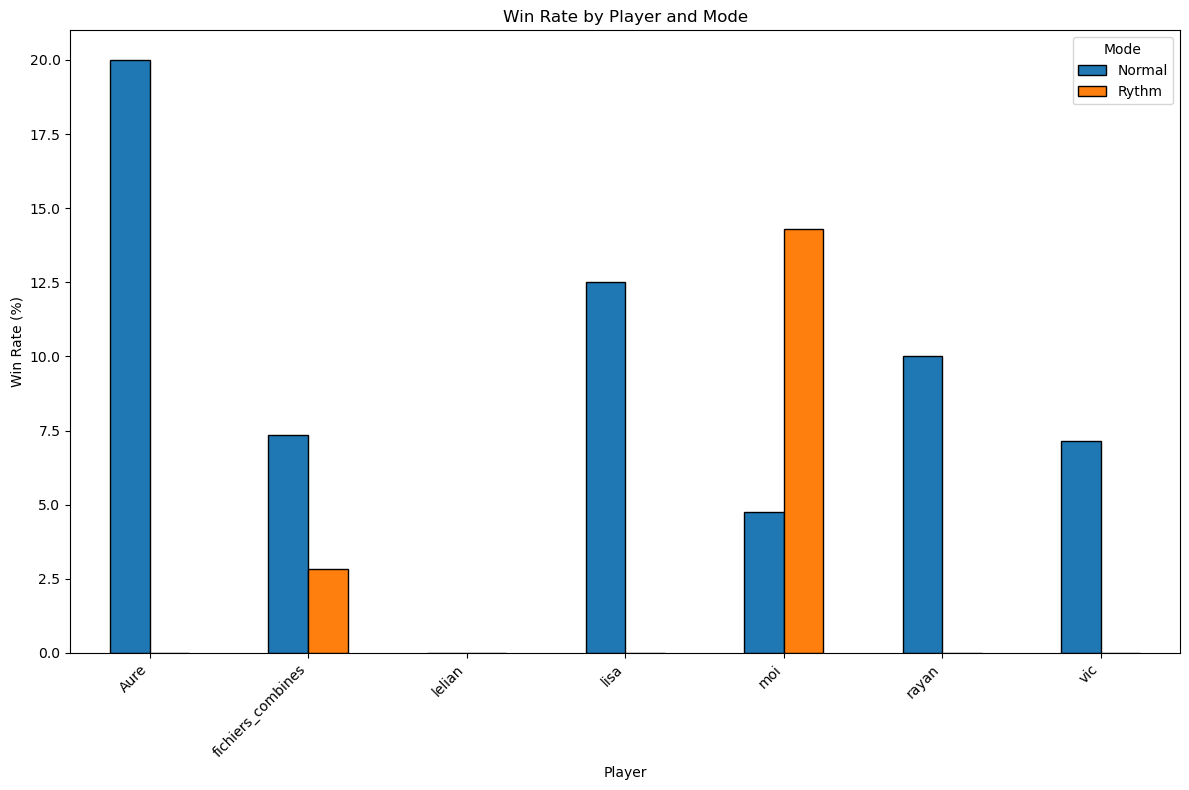

In [12]:
#Winrate for each player/mode
data = pd.read_csv('fichiers_combines.csv', delimiter=';')
games_played = data.groupby(['player_name', 'mode']).size()
games_cleared = data[data['cleared'] == 'Yes'].groupby(['player_name', 'mode']).size()
win_rates = (games_cleared / games_played * 100).fillna(0)
win_rate_pivot = win_rates.unstack().fillna(0)

win_rate_pivot.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title("Win Rate by Player and Mode")
plt.xlabel("Player")
plt.ylabel("Win Rate (%)")
plt.legend(title="Mode")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\fabie\AppData\Local\Temp\ipykernel_10984\4225248834.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


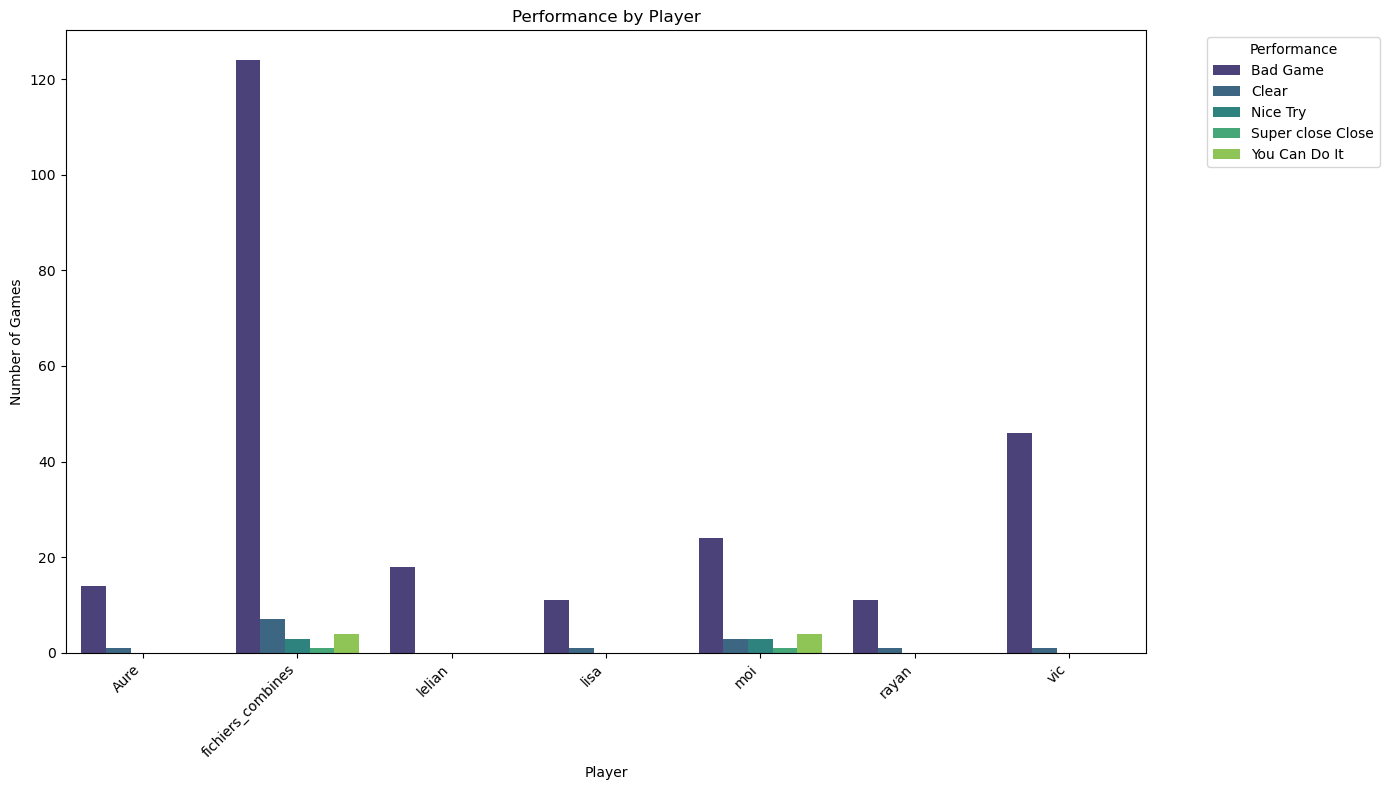

In [13]:

# Load the data
data = pd.read_csv('fichiers_combines.csv', delimiter=';')

# Categorize performance based on score
def categorize_performance(row):
    if row['cleared'] == 'Yes':
        return 'Clear'
    elif row['score'] < 30:
        return 'Bad Game'
    elif row['score'] < 60:
        return 'Nice Try'
    elif row['score'] < 100:
        return 'You Can Do It'
    else:
        return 'Super close Close'

data['performance'] = data.apply(categorize_performance, axis=1)

# Group data by player and performance category
performance_stats = data.groupby(['player_name', 'performance']).size().reset_index(name='count')

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=performance_stats,
    x='player_name',  # Corrected column name here
    y='count',
    hue='performance',
    palette='viridis',
    ci=None
)
plt.title("Performance by Player")
plt.xlabel("Player")
plt.ylabel("Number of Games")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Performance", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()